In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [244]:
SMI_d18O_tie_points = pd.read_csv('Chandler_data/d18O_SMI_tie_points.csv')
SMI_d18O_tie_points['Date'] = pd.to_datetime(SMI_d18O_tie_points['Date'])
SMI_d18O_tie_depth = SMI_d18O_tie_points['Depth_point']
SMI_d18O_tie_d18O = SMI_d18O_tie_points['d18O']
SMI_d18O_tie_time = SMI_d18O_tie_points['Date']
SMI_d18O_depth_df = pd.read_csv('Chandler_data/SMI_d18O.csv')
SMI_d18O_depth = SMI_d18O_depth_df['mm']
SMI_d18O = SMI_d18O_depth_df['d18O']

In [245]:
SMII_d18O_tie_points = pd.read_csv('Chandler_data/d18O_SMII_tie_points.csv')
SMII_d18O_tie_points['Date'] = pd.to_datetime(SMII_d18O_tie_points['Date'])
SMII_d18O_tie_depth = SMII_d18O_tie_points['Depth_point']
SMII_d18O_tie_d18O = SMII_d18O_tie_points['d18O']
SMII_d18O_tie_time = SMII_d18O_tie_points['Date']
SMII_d18O_depth_df = pd.read_csv('Chandler_data/SMII_d18O.csv')
SMII_d18O_depth = SMII_d18O_depth_df['mm']
SMII_d18O = SMII_d18O_depth_df['d18O']

In [246]:
def interpolate_depth_time(tie_time, depth, data, tie_depth):
    # Create interpolation function for depth to time
    tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds
    f_rel = interp1d(tie_depth, tie_time_ns, kind='linear', fill_value='extrapolate', assume_sorted=False)
    times_ns = f_rel(depth)                          # numeric nanoseconds for each measurement depth
    times = pd.to_datetime(times_ns)

    # Create a new time index with even spacing (1 month intervals)
    monthly_step = pd.DateOffset(months=1)
    even_time_segments = []
    for i in range(len(tie_time) - 1):
        t0, t1 = tie_time[i], tie_time[i+1]
        # build a date range with 1-month steps
        seg = pd.date_range(start=t0, end=t1, freq=monthly_step)
        # drop last point except for final interval
        if i < len(tie_time) - 2:
            seg = seg[:-1]
        even_time_segments.append(seg)
    even_time = pd.DatetimeIndex(np.concatenate(even_time_segments))

    even_time_ns = even_time.view('int64')  # numeric x-axis
    g = interp1d(times_ns, data, kind='linear', fill_value='extrapolate', assume_sorted=False)
    even_data = g(even_time_ns)

    months = even_time.month  # 1 - 12
    # climatology by month (ignores NaN by default in pandas)
    clim = pd.Series(even_data).groupby(months).mean()
    even_data_anom = even_data - clim[months].to_numpy()

    return even_data_anom, even_time

def visualize(times, data, title):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(times, data, '-o')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{title} Anomaly (‰)')
    ax.set_title(f'{title} (monthly, deseasonalized)')
    ax.grid(True)
    ax.invert_yaxis()  # Invert the y-axis for d18O convention
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3515681422.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds


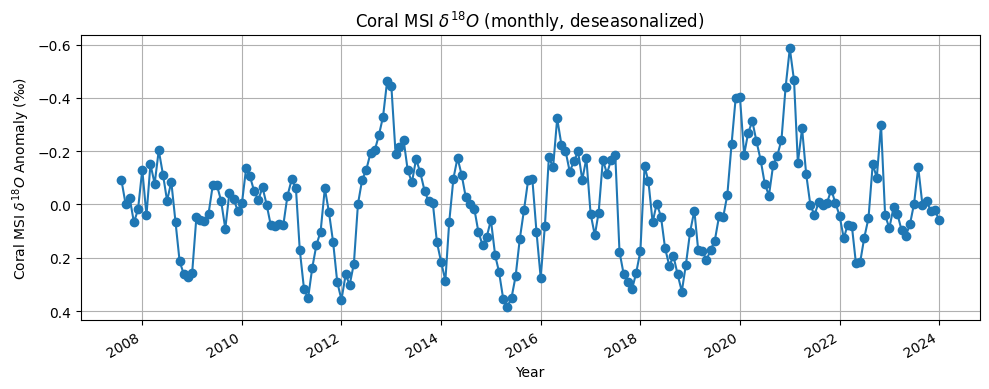

In [247]:
even_SMI_d18O_anom, SMI_d18O_even_time = interpolate_depth_time(SMI_d18O_tie_time, SMI_d18O_depth, SMI_d18O, SMI_d18O_tie_depth)
visualize(SMI_d18O_even_time, even_SMI_d18O_anom, 'Coral MSI $\delta^{18}O$')

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3515681422.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds


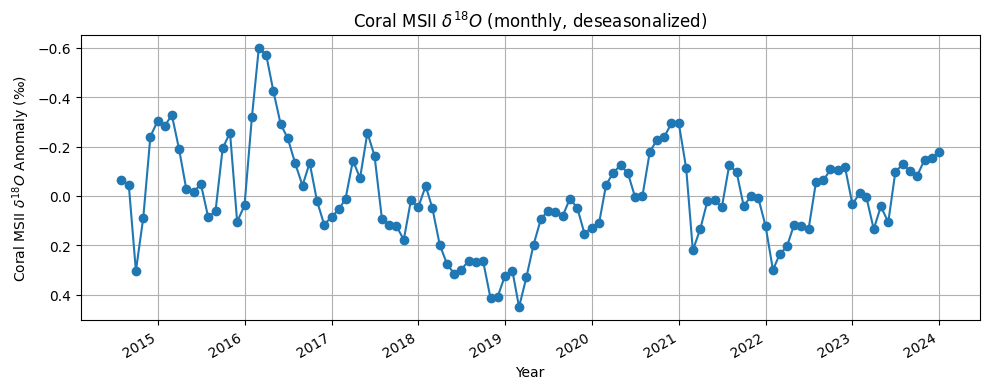

In [248]:
even_SMII_d18O_anom, SMII_d18O_even_time = interpolate_depth_time(SMII_d18O_tie_time, SMII_d18O_depth, SMII_d18O, SMII_d18O_tie_depth)
visualize(SMII_d18O_even_time, even_SMII_d18O_anom, 'Coral MSII $\delta^{18}O$')

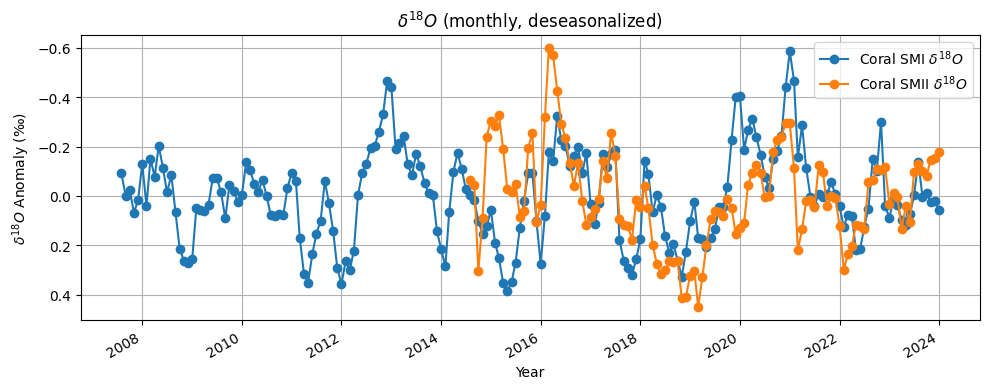

In [249]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(SMI_d18O_even_time, even_SMI_d18O_anom, '-o')
ax.plot(SMII_d18O_even_time, even_SMII_d18O_anom, '-o')
ax.set_xlabel('Year')
ax.set_ylabel(r'$\delta^{18}O$ Anomaly (‰)')
ax.set_title(r'$\delta^{18}O$ (monthly, deseasonalized)')
ax.grid(True)
ax.invert_yaxis()  # Invert the y-axis for d18O convention
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(['Coral SMI $\delta^{18}O$', 'Coral SMII $\delta^{18}O$'])
plt.show()

In [250]:
SMI_SrCa_tie_points = pd.read_csv('Chandler_data/SrCa_SMI_tie_points.csv')
SMI_SrCa_tie_points['Date'] = pd.to_datetime(SMI_SrCa_tie_points['Date'])
SMI_SrCa_tie_depth = SMI_SrCa_tie_points['Depth_point']
SMI_SrCa_tie_SrCa = SMI_SrCa_tie_points['SrCa']
SMI_SrCa_tie_time = SMI_SrCa_tie_points['Date']
SMI_SrCa_depth_df = pd.read_csv('Chandler_data/SMI_SrCa_with_depth.csv')
SMI_SrCa_depth = SMI_SrCa_depth_df['mm']
SMI_SrCa = SMI_SrCa_depth_df['SrCa']

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3515681422.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds


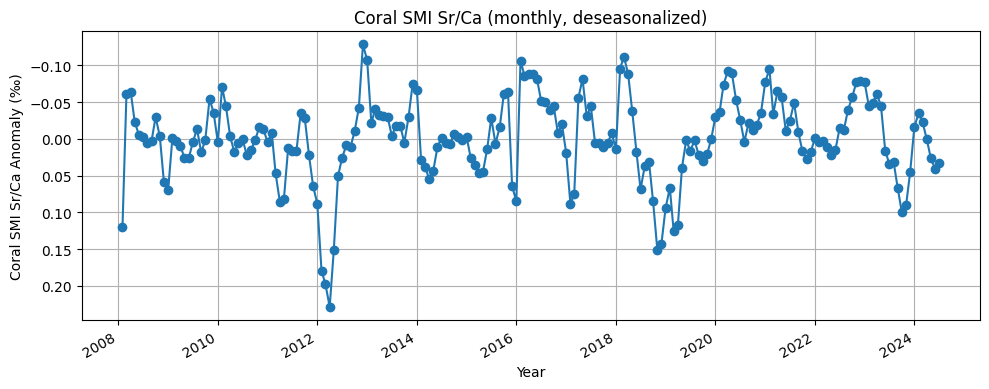

In [251]:
even_SMI_SrCa_anom, SMI_SrCa_even_time = interpolate_depth_time(SMI_SrCa_tie_time, SMI_SrCa_depth, SMI_SrCa, SMI_SrCa_tie_depth)
visualize(SMI_SrCa_even_time, even_SMI_SrCa_anom, 'Coral SMI Sr/Ca')

In [252]:
sst_df = pd.read_csv('Chandler_data/sst_data_year.csv')
sst_df['Date'] = pd.to_datetime(sst_df['Date'])
sss_df = pd.read_csv('Chandler_data/SSS_2010_2024.csv')
sss_df['Date'] = pd.to_datetime(sss_df['datetime'])

sst_df['Month'] = sst_df['Date'].dt.month
sst_clim = sst_df.groupby('Month')['SST'].mean()
sst_df['Anomaly'] = sst_df['SST'] - sst_clim[sst_df['Month']].to_numpy()
sss_df['Month'] = sss_df['Date'].dt.month
sss_clim = sss_df.groupby('Month')['sss'].mean()
sss_df['Anomaly'] = sss_df['sss'] - sss_clim[sss_df['Month']].to_numpy()

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/1622610634.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sst_df['Date'] = pd.to_datetime(sst_df['Date'])
/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/1622610634.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sss_df['Date'] = pd.to_datetime(sss_df['datetime'])


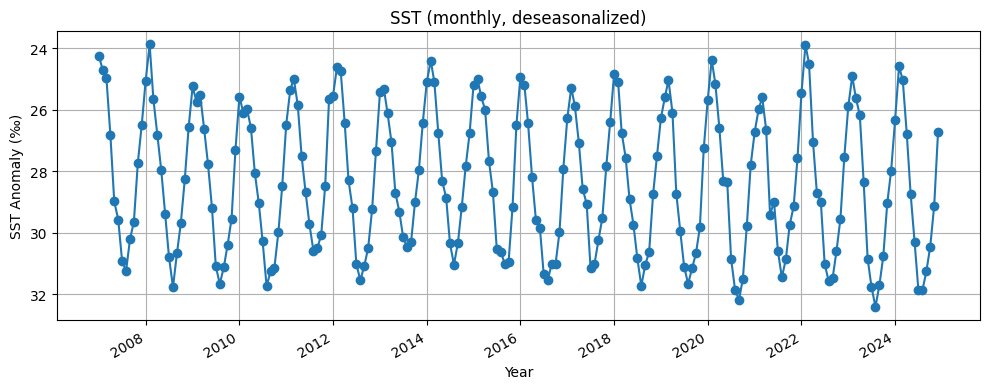

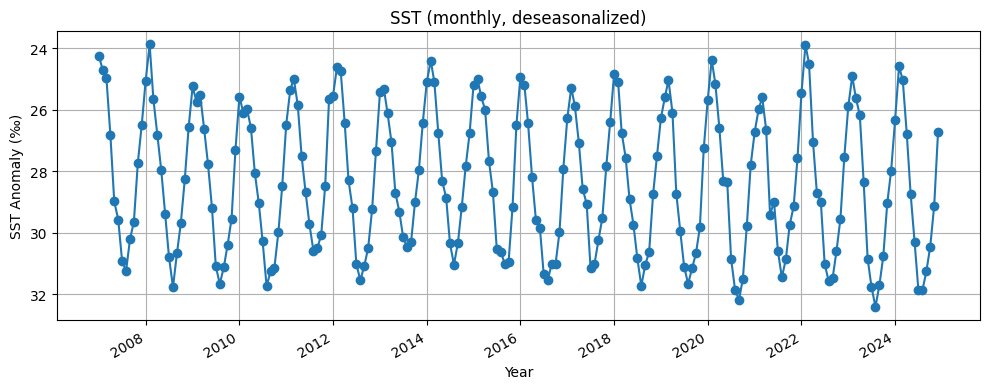

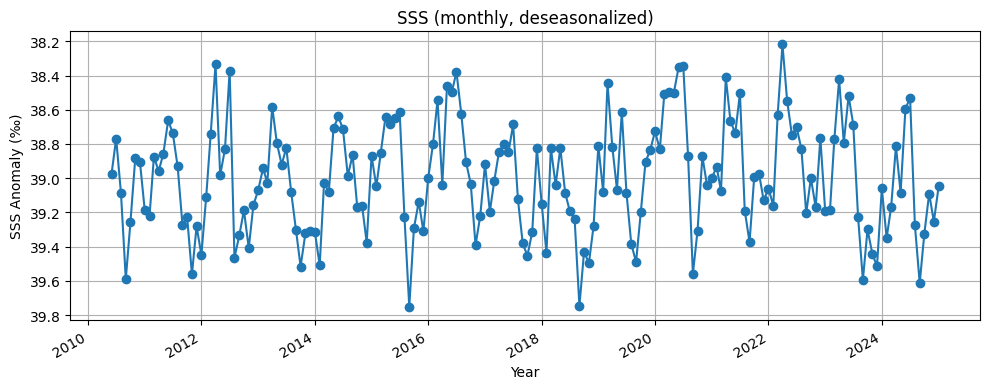

In [253]:
visualize(sst_df['Date'], sst_df['SST'], 'SST')
visualize(sss_df['Date'], sss_df['sss'], 'SSS')

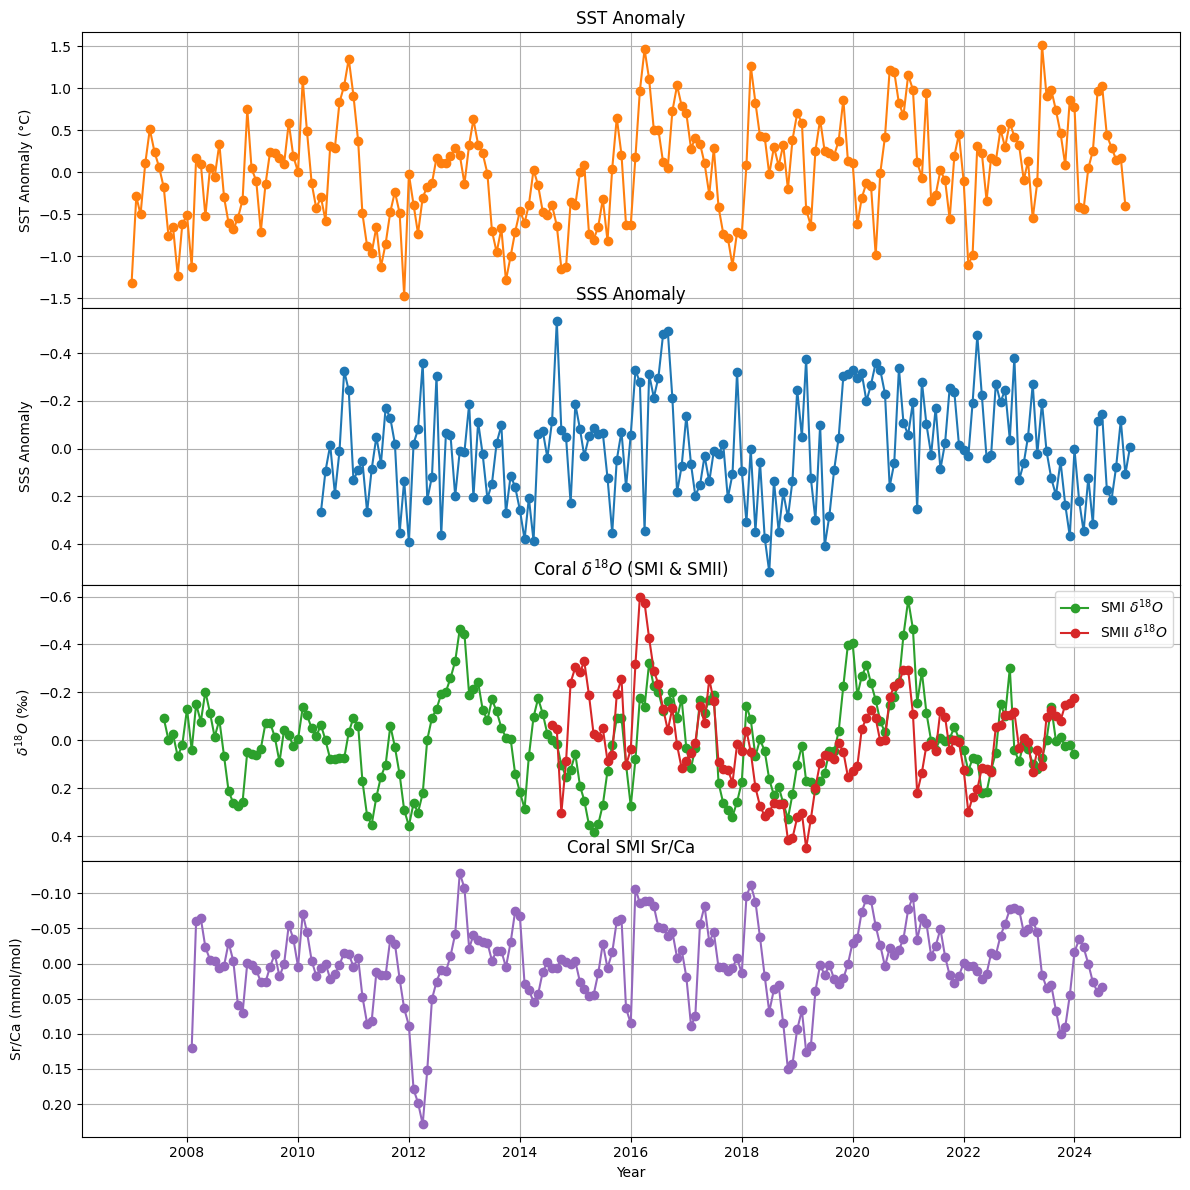

In [254]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True, gridspec_kw={'hspace': 0})

# 1. SST Anomaly
axs[0].plot(sst_df['Date'], sst_df['Anomaly'], '-o', color='tab:orange')
axs[0].set_ylabel('SST Anomaly (°C)')
axs[0].set_title('SST Anomaly')
axs[0].grid(True)

# 2. SSS Anomaly
axs[1].plot(sss_df['Date'], sss_df['Anomaly'], '-o', color='tab:blue')
axs[1].set_ylabel('SSS Anomaly')
axs[1].set_title('SSS Anomaly')
axs[1].grid(True)
axs[1].invert_yaxis()

# 3. SMI and SMII evenly distributed d18O
axs[2].plot(SMI_d18O_even_time, even_SMI_d18O_anom, '-o', color='tab:green', label='SMI $\delta^{18}O$')
axs[2].plot(SMII_d18O_even_time, even_SMII_d18O_anom, '-o', color='tab:red', label='SMII $\delta^{18}O$')
axs[2].set_ylabel('$\delta^{18}O$ (‰)')
axs[2].set_title('Coral $\delta^{18}O$ (SMI & SMII)')
axs[2].grid(True)
axs[2].invert_yaxis()
axs[2].legend()

# 4. SMI evenly distributed Sr/Ca
axs[3].plot(SMI_SrCa_even_time, even_SMI_SrCa_anom, '-o', color='tab:purple')
axs[3].set_ylabel('Sr/Ca (mmol/mol)')
axs[3].set_title('Coral SMI Sr/Ca')
axs[3].grid(True)
axs[3].invert_yaxis()
axs[3].set_xlabel('Year')

plt.tight_layout()
plt.show()

In [255]:
def interpolate_depth_time_no_anom(tie_time, depth, data, tie_depth):
    # Create interpolation function for depth to time
    tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds
    f_rel = interp1d(tie_depth, tie_time_ns, kind='linear', fill_value='extrapolate', assume_sorted=False)
    times_ns = f_rel(depth)                          # numeric nanoseconds for each measurement depth
    times = pd.to_datetime(times_ns)

    # Create a new time index with even spacing (1 month intervals)
    monthly_step = pd.DateOffset(months=1)
    even_time_segments = []
    for i in range(len(tie_time) - 1):
        t0, t1 = tie_time[i], tie_time[i+1]
        # build a date range with 1-month steps
        seg = pd.date_range(start=t0, end=t1, freq=monthly_step)
        # drop last point except for final interval
        if i < len(tie_time) - 2:
            seg = seg[:-1]
        even_time_segments.append(seg)
    even_time = pd.DatetimeIndex(np.concatenate(even_time_segments))

    even_time_ns = even_time.view('int64')  # numeric x-axis
    g = interp1d(times_ns, data, kind='linear', fill_value='extrapolate', assume_sorted=False)
    even_data = g(even_time_ns)

    return even_data, even_time

In [256]:
even_SMI_d18O, SMI_d18O_even_time = interpolate_depth_time_no_anom(SMI_d18O_tie_time, SMI_d18O_depth, SMI_d18O, SMI_d18O_tie_depth)
even_SMII_d18O, SMII_d18O_even_time = interpolate_depth_time_no_anom(SMII_d18O_tie_time, SMII_d18O_depth, SMII_d18O, SMII_d18O_tie_depth)
even_SMI_SrCa, SMI_SrCa_even_time = interpolate_depth_time_no_anom(SMI_SrCa_tie_time, SMI_SrCa_depth, SMI_SrCa, SMI_SrCa_tie_depth)

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3207143547.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds
/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3207143547.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds
/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3207143547.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds


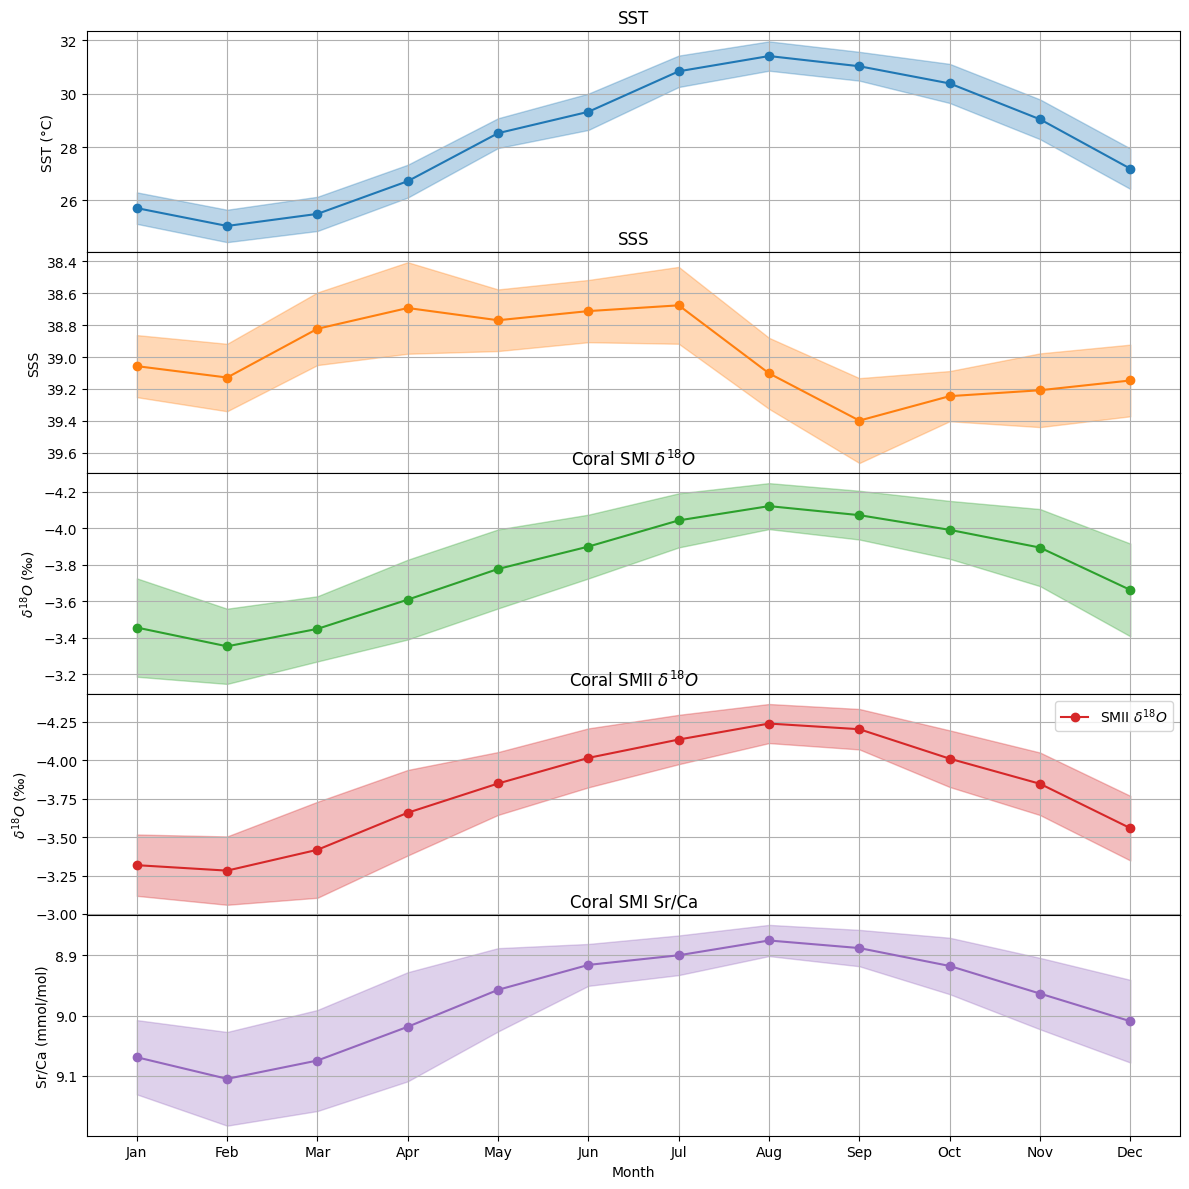

In [257]:
# Calculate monthly means and 1SDs for overlapping period
overlap_start = pd.Timestamp('2010-01-01')
overlap_end = pd.Timestamp('2024-12-31')

# SST
sst_overlap = sst_df[(sst_df['Date'] >= overlap_start) & (sst_df['Date'] <= overlap_end)].copy()
sst_overlap['Month'] = sst_overlap['Date'].dt.month
sst_monthly_mean = sst_overlap.groupby('Month')['SST'].mean()
sst_monthly_std = sst_overlap.groupby('Month')['SST'].std()

# SSS
sss_overlap = sss_df[(sss_df['Date'] >= overlap_start) & (sss_df['Date'] <= overlap_end)].copy()
sss_overlap['Month'] = sss_overlap['Date'].dt.month
sss_monthly_mean = sss_overlap.groupby('Month')['sss'].mean()
sss_monthly_std = sss_overlap.groupby('Month')['sss'].std()

# SMI d18O
SMI_d18O_mask = (SMI_d18O_even_time >= overlap_start) & (SMI_d18O_even_time <= overlap_end)
SMI_d18O_month = SMI_d18O_even_time[SMI_d18O_mask].month
SMI_d18O_vals = even_SMI_d18O[SMI_d18O_mask]
SMI_d18O_monthly_mean = pd.Series(SMI_d18O_vals).groupby(SMI_d18O_month).mean()
SMI_d18O_monthly_std = pd.Series(SMI_d18O_vals).groupby(SMI_d18O_month).std()

# SMII d18O
SMII_d18O_mask = (SMII_d18O_even_time >= overlap_start) & (SMII_d18O_even_time <= overlap_end)
SMII_d18O_month = SMII_d18O_even_time[SMII_d18O_mask].month
SMII_d18O_vals = even_SMII_d18O[SMII_d18O_mask]
SMII_d18O_monthly_mean = pd.Series(SMII_d18O_vals).groupby(SMII_d18O_month).mean()
SMII_d18O_monthly_std = pd.Series(SMII_d18O_vals).groupby(SMII_d18O_month).std()

# SMI Sr/Ca
SMI_SrCa_mask = (SMI_SrCa_even_time >= overlap_start) & (SMI_SrCa_even_time <= overlap_end)
SMI_SrCa_month = SMI_SrCa_even_time[SMI_SrCa_mask].month
SMI_SrCa_vals = even_SMI_SrCa[SMI_SrCa_mask]
SMI_SrCa_monthly_mean = pd.Series(SMI_SrCa_vals).groupby(SMI_SrCa_month).mean()
SMI_SrCa_monthly_std = pd.Series(SMI_SrCa_vals).groupby(SMI_SrCa_month).std()

months = np.arange(1, 13)

fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True, gridspec_kw={'hspace': 0})

# 1. SST
axs[0].plot(months, sst_monthly_mean, '-o', color='tab:blue')
axs[0].fill_between(months, sst_monthly_mean - sst_monthly_std, sst_monthly_mean + sst_monthly_std, color='tab:blue', alpha=0.3)
axs[0].set_ylabel('SST (°C)')
axs[0].set_title('SST')
axs[0].grid(True)

# 2. SSS
axs[1].plot(months, sss_monthly_mean, '-o', color='tab:orange')
axs[1].fill_between(months, sss_monthly_mean - sss_monthly_std, sss_monthly_mean + sss_monthly_std, color='tab:orange', alpha=0.3)
axs[1].set_ylabel('SSS')
axs[1].set_title('SSS')
axs[1].grid(True)
axs[1].invert_yaxis()

# 3. SMI and SMII d18O
axs[2].plot(months, SMI_d18O_monthly_mean, '-o', color='tab:green', label='SMI $\delta^{18}O$')
axs[2].fill_between(months, SMI_d18O_monthly_mean - SMI_d18O_monthly_std, SMI_d18O_monthly_mean + SMI_d18O_monthly_std, color='tab:green', alpha=0.2)
axs[2].plot(months, SMII_d18O_monthly_mean, '-o', color='tab:red', label='SMII $\delta^{18}O$')
axs[2].fill_between(months, SMII_d18O_monthly_mean - SMII_d18O_monthly_std, SMII_d18O_monthly_mean + SMII_d18O_monthly_std, color='tab:red', alpha=0.2)
axs[2].set_ylabel('$\delta^{18}O$ (‰)')
axs[2].set_title('Coral $\delta^{18}O$')
axs[2].grid(True)
axs[2].invert_yaxis()
axs[2].legend()

# 4. SMI Sr/Ca
axs[3].plot(months, SMI_SrCa_monthly_mean, '-o', color='tab:purple')
axs[3].fill_between(months, SMI_SrCa_monthly_mean - SMI_SrCa_monthly_std, SMI_SrCa_monthly_mean + SMI_SrCa_monthly_std, color='tab:purple', alpha=0.3)
axs[3].set_ylabel('Sr/Ca (mmol/mol)')
axs[3].set_title('Coral SMI Sr/Ca')
axs[3].grid(True)
axs[3].invert_yaxis()
axs[3].set_xlabel('Month')
axs[3].set_xticks(months)
axs[3].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

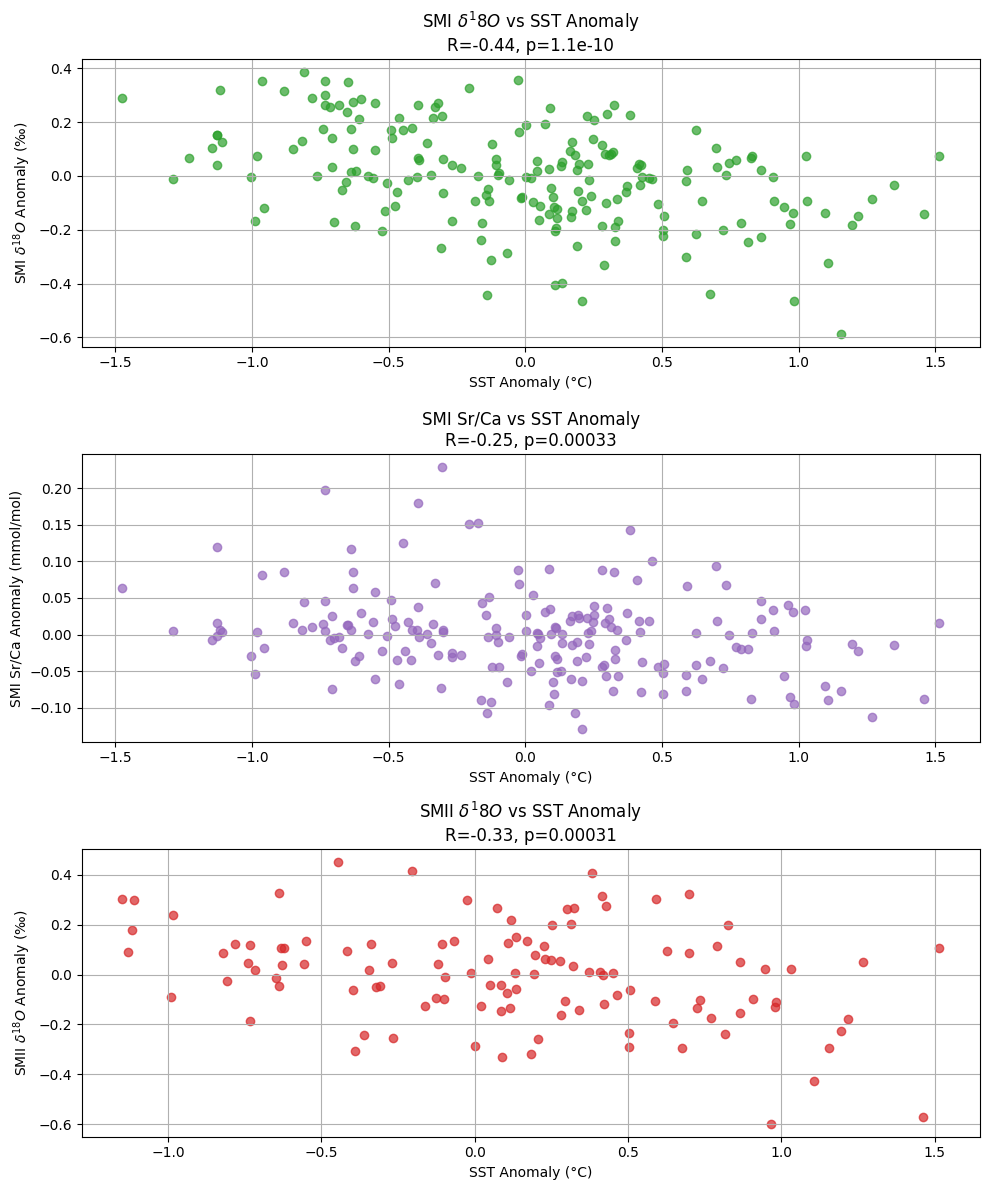

In [260]:
from scipy.stats import pearsonr

# Interpolate SST anomalies to coral time axes
sst_anom_interp_SMI = np.interp(SMI_d18O_even_time.astype(np.int64), sst_df['Date'].astype(np.int64), sst_df['Anomaly'])
sst_anom_interp_SMII = np.interp(SMII_d18O_even_time.astype(np.int64), sst_df['Date'].astype(np.int64), sst_df['Anomaly'])
sst_anom_interp_SrCa = np.interp(SMI_SrCa_even_time.astype(np.int64), sst_df['Date'].astype(np.int64), sst_df['Anomaly'])

# Calculate correlations
r_SMI_d18O, p_SMI_d18O = pearsonr(even_SMI_d18O_anom, sst_anom_interp_SMI)
r_SMII_d18O, p_SMII_d18O = pearsonr(even_SMII_d18O_anom, sst_anom_interp_SMII)
r_SMI_SrCa, p_SMI_SrCa = pearsonr(even_SMI_SrCa_anom, sst_anom_interp_SrCa)

# Plot
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].scatter(sst_anom_interp_SMI, even_SMI_d18O_anom, color='tab:green', alpha=0.7)
axs[0].set_xlabel('SST Anomaly (°C)')
axs[0].set_ylabel('SMI $\\delta^{18}O$ Anomaly (‰)')
axs[0].set_title(f'SMI $\\delta^{18}O$ vs SST Anomaly\nR={r_SMI_d18O:.2f}, p={p_SMI_d18O:.2g}')
axs[0].grid(True)

axs[1].scatter(sst_anom_interp_SrCa, even_SMI_SrCa_anom, color='tab:purple', alpha=0.7)
axs[1].set_xlabel('SST Anomaly (°C)')
axs[1].set_ylabel('SMI Sr/Ca Anomaly (mmol/mol)')
axs[1].set_title(f'SMI Sr/Ca vs SST Anomaly\nR={r_SMI_SrCa:.2f}, p={p_SMI_SrCa:.2g}')
axs[1].grid(True)

axs[2].scatter(sst_anom_interp_SMII, even_SMII_d18O_anom, color='tab:red', alpha=0.7)
axs[2].set_xlabel('SST Anomaly (°C)')
axs[2].set_ylabel('SMII $\\delta^{18}O$ Anomaly (‰)')
axs[2].set_title(f'SMII $\\delta^{18}O$ vs SST Anomaly\nR={r_SMII_d18O:.2f}, p={p_SMII_d18O:.2g}')
axs[2].grid(True)

plt.tight_layout()
plt.show()